In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"A:\Study Material\CS\DataScience\00Kaggle_data\Data\Titanic\train.csv")
#test_data=pd.read_csv(r"C:\Users\Code_love_r\Desktop\DataScience\00Kaggle_data\Data\Titanic\test.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


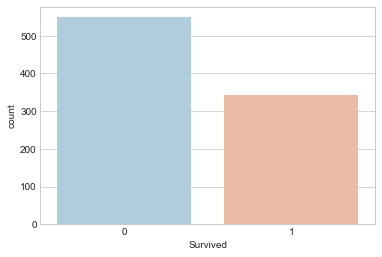

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r')

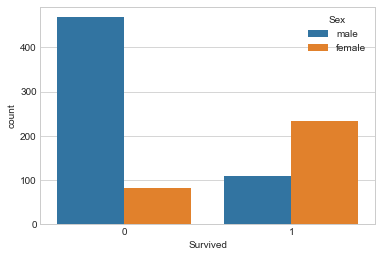

In [6]:
sns.countplot(x='Survived',hue='Sex',data=data)

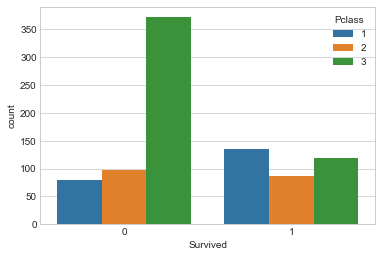

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=data)

C:\Users\Code_love_r\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Code_love_r\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


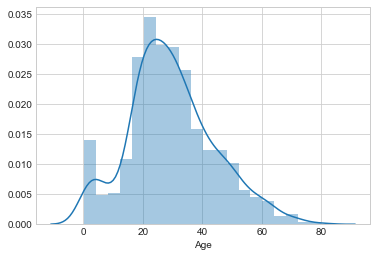

In [8]:
sns.distplot(data['Age'].dropna())

In [9]:
np.mean(data['Age'].dropna())


29.69911764705882

In [10]:
np.std(data['Age'].dropna())

14.516321150817317

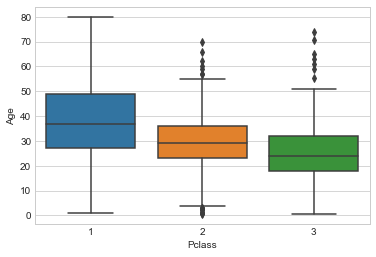

In [11]:
sns.boxplot(x='Pclass',y='Age',data=data)

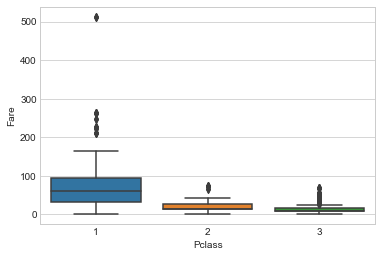

In [12]:
sns.boxplot(x='Pclass',y='Fare',data=data)

In [13]:
def impute_age(lst):
    Age=lst[0]
    Pclass=lst[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [14]:
def impute_cabin(lst):
    cabin=lst[0]
    if pd.isnull(cabin):
        return 0
    else:
        return 1
data['Cabin']=data[['Cabin']].apply(impute_cabin,axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [16]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null int64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label=LabelEncoder()
integer_encoded=label.fit_transform(data['Sex'])
data['Sex']=integer_encoded


In [18]:
Embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [19]:
final=data.drop(['Ticket','Name','PassengerId','Embarked'],axis=1)
final.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


In [20]:
final=pd.concat([final,Embark],axis=1)


In [21]:
Q1 = final.quantile(0.25)
Q3 = final.quantile(0.75)
IQR = Q3 - Q1


In [22]:
min=Q1 - 1.5 * IQR
max=Q3 + 1.5 * IQR


In [23]:
def handle_outlier(lst):
    Age=lst[0]
    if Age>max['Age']:
        return max['Age']
    elif Age<min['Age']:
        return min['Age']
    else:
        return Age
#final['Age'] = final[['Age']].apply(handle_outlier,axis=1)

In [24]:
def handle_fareoutlier(Fare):
    if Fare>max['Fare']:
        return max['Fare']
    elif Fare<min['Fare']:
        return min['Fare']
    else:
        return Fare
#final['Fare'] = final['Fare'].apply(handle_fareoutlier)

In [25]:
final['Age'].head()


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [26]:
# from scipy import stats
# z=np.abs(stats.zscore(final))
# print(np.where(z > 3))

In [27]:
a=final.values

In [28]:
final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [29]:
#from sklearn.preprocessing import Imputer
#imputer=Imputer()
#a=imputer.fit_transform(a)

In [30]:
X=a[:,1:10]

In [31]:
X.shape

(889, 9)

In [32]:
Y=a[:,0]
Y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1.

In [33]:
Y.shape

(889,)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)


(622,)

In [35]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# logreg=LogisticRegression()
# logreg.fit(X_train,Y_train)
# predict=logreg.predict(X_test)
# metrics.accuracy_score(Y_test,predict) 





In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

model=XGBClassifier()
model.fit(X_train,Y_train)
predict=model.predict(X_test)
metrics.accuracy_score(Y_test,predict)

C:\Users\Code_love_r\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Code_love_r\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8202247191011236

In [37]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# kfold=KFold(n_splits=5,random_state=7)
# result=cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
# print(result.mean())

In [38]:
test_data=pd.read_csv(r"F:\Study Material\CS\DataScience\00Kaggle_data\Data\Titanic\test.csv")

FileNotFoundError: File b'F:\\Study Material\\CS\\DataScience\\00Kaggle_data\\Data\\Titanic\\test.csv' does not exist

In [ ]:
test_data.head()

In [ ]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)
test_data['Cabin']=test_data[['Cabin']].apply(impute_cabin,axis=1)

In [ ]:
#test_data.dropna(inplace=True)
test_data.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label=LabelEncoder()
integer_encoded_test=label.fit_transform(test_data['Sex'])
test_data['Sex']=integer_encoded_test


In [ ]:
Embark=pd.get_dummies(test_data['Embarked'],drop_first=True)

In [ ]:
final_test=test_data.drop(['PassengerId','Ticket','Name','Embarked'],axis=1)
final_test=pd.concat([final_test,Embark],axis=1)
final_test.head()


In [ ]:
# Q1 = final_test.quantile(0.25)
# Q3 = final_test.quantile(0.75)
# IQR = Q3 - Q1
# min=Q1 - 1.5 * IQR
# max=Q3 + 1.5 * IQR
# max

In [ ]:
# final_test['Age'] = final_test[['Age']].apply(handle_outlier,axis=1)
# final_test['Fare'] = final_test['Fare'].apply(handle_fareoutlier)

In [ ]:
sns.boxplot(final_test['Age'])

In [ ]:
final_test.shape

In [ ]:
b=final_test.values


In [ ]:
from sklearn.preprocessing import Imputer
imputer=Imputer()

In [ ]:
value=imputer.fit_transform(b)
value.shape

In [ ]:
predict=model.predict(value) 
#predict.astype(int)


In [ ]:
d={"PassengerId":test_data["PassengerId"],"Survived":predict.astype(np.int32)}
check=pd.DataFrame(d)
check.to_csv("res1.csv",index=False)

In [ ]:
pwd

In [ ]:
value.shape, X_train.shape

In [ ]:
predict.astype(np.int32)